# Descripción del dataset

Usando el conjunto de datos de [food-101](https://www.kaggle.com/datasets/dansbecker/food-101) que nos presenta un archivo comprimido con miles de imágenes de comidas comunes.

Por el cual procedemos a mostrar por medio de un *Dataframe* de la librería **pandas** los labels existentes en nuestro dataset.

Posteriormente, en el siguiente apartado se quiere buscar la dirección de la imágen según el orden de los directorios que se manejan de la siguiente forma ***Comida*/*número del archivo***. Se busca tomar los primeros 2 una vez que se haya usado el método *shuffle* que busca reordenar el arreglo de forma aleatoria, para de esta forma mostrar algunas de las imágenes existentes, si se desea poder ver más imágenes se puede volver a correr los correspondientes bloques de código. 


In [1]:
# Declaración de algunos de los paquetes que se estarán utilizando dentro de este archivo
import time, cv2, os # type: ignore
import numpy as np
import pandas as pd # type: ignore
from random import shuffle
from matplotlib import pyplot as plt # type: ignore
# from sklearn.model_selection import ShuffleSplit # Función para reordenar los datos de entrenamiento, haciendo dos conjuntos para entrenamiento y pruebas para asegurarse que el modelo esté siendo entrenado de la manera correcta. 

In [2]:
PATH = "../../dataset/food-101/food-101/meta/labels.txt"
LABELS = []
print("Extracting labels...")
time.sleep(2)

with open(PATH, "r") as labels:
    for line in labels:
        LABELS.append(line[:-1])

df_labels = pd.DataFrame(data=LABELS, columns=["Labels"])
df_labels.index = range(1, len(df_labels) + 1)
df_labels

Extracting labels...


,Labels
1,Apple pie
2,Baby back ribs
3,Baklava
4,Beef carpaccio
5,Beef tartare
...,...
97,Tacos
98,Takoyaki
99,Tiramisu
100,Tuna tartare


In [3]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES = IMG_NAMES[:1500]
    IMG_NAMES_COPY = IMG_NAMES[:2]

df_img_names = pd.DataFrame(columns=["Name","Label"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[1], name.split("/")[0]]], columns=["Name","Label"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names        

Extracting data for show images...


,Name,Label
0,1402073,foie_gras
1,3735346,caprese_salad
2,924167,bruschetta
3,3042459,pizza
4,595790,shrimp_and_grits
...,...,...
1495,2699401,cannoli
1496,1232614,risotto
1497,2610867,lobster_bisque
1498,397512,grilled_salmon


## Extracción de las imagenes

Por medio de la extracción del nombre de las imágenes en el proceso anterior las pasamos por la función *imread* de la librería *cv2* que nos permitirá leer las imágenes y tenerlas en un arreglo para su posterior presentación con la librería **matplotlib**

In [4]:
images = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{img}.jpg') for img in IMG_NAMES_COPY]

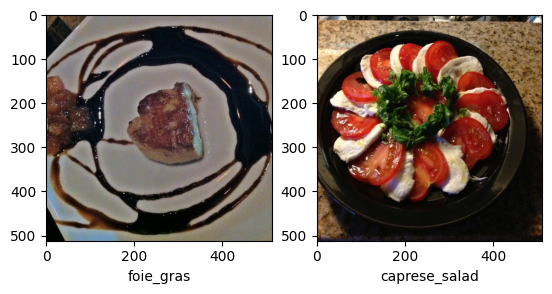

In [5]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[0].split("/")[0])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[1].split("/")[0])

plt.show()

del images
del IMG_NAMES_COPY

# Vista minable

A partir del preview anterior tenemos una idea del proceso del cuál será parte la extracción de los datos para el modelo que se desea entrenar. Tomamos el mismo proceso anterior pero apartando 1000 imágenes que serán tomadas como imágenes de entrenamiento y prueba del modelo basado en las etiquetas que se tomen primero que serán guardadas en un archivo aparte para poder usarlas posteriormente.

In [6]:
del IMG_NAMES
del new_row
df_img_names

,Name,Label
0,1402073,foie_gras
1,3735346,caprese_salad
2,924167,bruschetta
3,3042459,pizza
4,595790,shrimp_and_grits
...,...,...
1495,2699401,cannoli
1496,1232614,risotto
1497,2610867,lobster_bisque
1498,397512,grilled_salmon


In [7]:
df_labels = pd.DataFrame(data=df_img_names["Label"].unique(), columns=["Label"])
df_labels = df_labels.sort_values(by='Label', ascending=True).reset_index(drop=True)
df_labels

,Label
0,apple_pie
1,baby_back_ribs
2,baklava
3,beef_carpaccio
4,beef_tartare
...,...
96,tacos
97,takoyaki
98,tiramisu
99,tuna_tartare


In [8]:
os.makedirs('../../dataset/vista_minable/meta', exist_ok=True)
df_img_names.to_csv('../../dataset/vista_minable/meta/train_test_labels.csv', encoding='utf-8', index=False)
df_labels.to_csv('../../dataset/vista_minable/meta/labels.csv', encoding='utf-8', index=False)
del df_img_names
del df_labels

## Procesamiento de las imagenes para entrenamiento

Una vez procesada la información de las imágenes que serán usadas para el entrenamiento del modelo procedemos a identificar las imágenes con un algoritmo que nos permite redimencionarlas para que sea más fácil para el modelo identificar las diferencias entre las mismas para de esta forma clasificarlas. Utilizaremos los siguientes pasos

1. Sacar la información guardada en el archivo de la vista minable.
2. Pasar cada imagen por la función resize de nuestra librería para asegurarnos que la misma tenga el formato deseado (28x28).
3. Bajo un esquema similar al de la extracción de imágenes que se muestra con anterioridad pero con las 1000 imágenes que fueron apartadas.

In [9]:
df_img = pd.read_csv('../../dataset/vista_minable/meta/train_test_labels.csv')
df_img

,Name,Label
0,1402073,foie_gras
1,3735346,caprese_salad
2,924167,bruschetta
3,3042459,pizza
4,595790,shrimp_and_grits
...,...,...
1495,2699401,cannoli
1496,1232614,risotto
1497,2610867,lobster_bisque
1498,397512,grilled_salmon


In [10]:
df_labels = pd.read_csv('../../dataset/vista_minable/meta/labels.csv')
df_labels.index = range(1, len(df_labels) + 1)
df_labels

,Label
1,apple_pie
2,baby_back_ribs
3,baklava
4,beef_carpaccio
5,beef_tartare
...,...
97,tacos
98,takoyaki
99,tiramisu
100,tuna_tartare


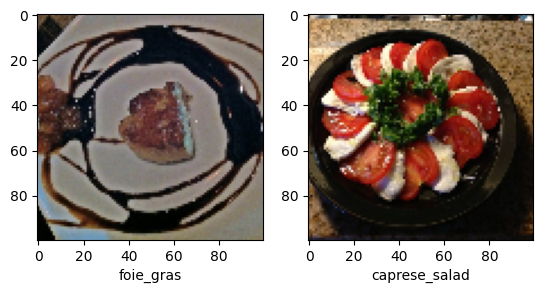

In [11]:
images_training = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{label}/{name}.jpg') for name, label in df_img.values]

images_training = [cv2.resize(img, (100, 100)) for img in images_training]

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images_training[0], cv2.COLOR_BGR2RGB))
plt.xlabel(df_img.values[0][1])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images_training[1], cv2.COLOR_BGR2RGB))
plt.xlabel(df_img.values[1][1])

plt.show()

## Diseño del modelo

Se busca con el mismo poder analizar imágenes, ya sea provenientes del módulo de la aplicación así como dentro de las pruebas internas para asegurar que el modelo fue entrenado de manera adecuada. Se busca utilizar las siguientes capas para este modelo, cómo lo son:

* *Conv2D*: capa encargada de analizar la imagen por medio de una mátriz o kernel que busca identificar las características más relevantes de la misma. Entendiendo que mientras más capas existan dentro de la jerarquía puede analizar características mucho más complejas de la imagen en cuestión.
* *MaxPooling2D*: Reduce el tamaño del mapa generado por la capa anterior para de esta manera preservar las características más relevantes de los datos suministrados.
* *Flatten*: permite moldear los datos a un arreglo lineal para posterior análisis dependiendo de los datos que se tengan producto de las capas anteriores.
* *Dense*: las capas densas son la forma más básica dentro de los modelos que permiten realizar cálculos con respecto a los valores previamente presentados con su respectiva capa de activación, para este caso se va a usar *ReLU* para el análisis preliminar antes de brindar una respuesta definitiva usando la capa *softmax*.

In [12]:
import tensorflow # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.metrics import SparseCategoricalAccuracy # type: ignore
from tensorflow.keras.losses import SparseCategoricalCrossentropy # type: ignore

2024-12-16 21:53:59.209166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 21:53:59.215250: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 21:53:59.227086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734400439.246170   42964 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734400439.251697   42964 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 21:53:59.272891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3), padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.03),
    Dense(512, activation='relu'),
    Dropout(0.03),
    Dense(len(df_labels) + 1, activation='softmax') 
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=[SparseCategoricalAccuracy()])

model.summary()

/home/jonasaray/Workspace/NutricionAI/nutricionBackend/venv/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-16 21:55:06.646363: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    40,960,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,276,390 (157.46 MB)

 Trainable params: 41,276,390 (157.46 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def compare_row(row):
    for index, value in df_labels.iterrows():
        if row['Label'] == value.values[0]:
            return index

df_img['Label'] = df_img.apply(compare_row, axis=1)
df_img

,Name,Label
0,1402073,40
1,3735346,14
2,924167,11
3,3042459,77
4,595790,90
...,...,...
1495,2699401,13
1496,1232614,85
1497,2610867,61
1498,397512,51


In [15]:
ds_train = tensorflow.convert_to_tensor(images_training[:1200], tensorflow.int32)
ds_labels_train = tensorflow.convert_to_tensor(df_img["Label"].values[:1200], tensorflow.int32)
ds_test = tensorflow.convert_to_tensor(images_training[1200:], tensorflow.int32)
ds_labels_test = tensorflow.convert_to_tensor(df_img["Label"].values[1200:], tensorflow.int32)

2024-12-16 21:54:05.108276: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144000000 exceeds 10% of free system memory.


In [18]:
model.fit(ds_train, ds_labels_train, epochs=10, validation_data=[ds_test, ds_labels_test])

Epoch 1/10


/home/jonasaray/Workspace/NutricionAI/nutricionBackend/venv/lib64/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 596ms/step - loss: 1195.3363 - sparse_categorical_accuracy: 0.0116 - val_loss: 16.1659 - val_sparse_categorical_accuracy: 0.0067
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 599ms/step - loss: 10.0209 - sparse_categorical_accuracy: 0.0336 - val_loss: 6.4948 - val_sparse_categorical_accuracy: 0.0100
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 573ms/step - loss: 2.9101 - sparse_categorical_accuracy: 0.3570 - val_loss: 6.1290 - val_sparse_categorical_accuracy: 0.0100
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step - loss: 1.5287 - sparse_categorical_accuracy: 0.7363 - val_loss: 6.4503 - val_sparse_categorical_accuracy: 0.0033
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 578ms/step - loss: 0.6909 - sparse_categorical_accuracy: 0.8929 - val_loss: 7.1507 - val_sparse_categorical_accuracy: 0.0033
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - loss: 0.2858 - sparse_categorical_accuracy: 0.9530 - val_loss: 7.3948 - val_sparse_categorical_accuracy: 0.0067
Epoc

In [20]:
test_loss, test_acc = model.evaluate(ds_test, ds_labels_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 8.5707 - sparse_categorical_accuracy: 0.0085
Test accuracy: 0.006666666828095913
Test loss: 8.560186386108398
